# DAP 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("./processeddata/rent.csv", index_col=0)

In [2]:
data

,ave_household_size,median_income,rental_vacancy_rate,p_units_1_detached,p_units_1,p_units_2,p_units_34,p_units_59,p_units_10,p_units_20,...,p_built_1990,p_built_1980,p_built_1970,p_built_1960,p_built_1950,p_built_1940,p_built_1930,median_rooms,median_rent,median-value
1,2.46,40724.0,26.8,69.7,0.0,11.2,2.3,0.0,3.7,0.9,...,12.4,12.8,20.1,19.3,10.9,7.6,11.5,5.4,553.0,80200.0
2,2.73,49077.0,3.4,90.9,0.6,0.0,0.0,0.0,1.2,0.0,...,10.7,7.1,20.5,31.2,13.3,8.3,5.5,5.9,862.0,97100.0
3,2.14,35250.0,0.0,66.0,0.0,7.4,2.7,3.2,0.0,0.8,...,27.4,12.0,22.3,13.3,6.6,3.5,3.7,5.8,356.0,75100.0
4,2.85,19821.0,0.0,63.5,0.0,0.0,0.0,0.0,0.0,0.0,...,19.5,9.0,9.0,5.5,14.5,19.0,14.5,4.7,533.0,38800.0
5,2.97,74383.0,7.2,84.8,3.2,0.6,1.2,2.8,1.4,0.9,...,35.3,15.5,15.0,4.0,2.3,1.0,0.6,6.6,983.0,167800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29297,1.95,48125.0,17.3,68.8,2.6,7.7,0.0,2.8,0.0,0.0,...,15.5,13.2,24.0,4.9,11.0,7.3,15.0,5.1,711.0,136000.0
29306,2.25,46924.0,10.4,75.3,2.9,1.9,4.8,3.5,3.1,1.1,...,2.9,23.6,26.8,6.0,14.3,2.4,19.5,6.4,648.0,166200.0
29310,2.36,49191.0,17.4,70.8,3.1,2.7,10.4,1.6,0.8,1.1,...,4.7,6.4,24.4,17.0,26.0,6.0,9.1,5.9,606.0,137800.0
29311,2.49,75500.0,17.7,37.8,0.8,2.7,1.4,0.0,0.0,10.8,...,15.3,25.3,22.3,0.9,1.0,0.0,0.0,5.6,1088.0,172400.0


In [3]:
y = data[["median_rent"]]
X = data.drop(columns=["median_rent"])

In [4]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [5]:
# split into train test splits of varying size
splits = {}
cv_splits = {}
kf= KFold(n_splits=10, shuffle=True, random_state=42)
scaler = MinMaxScaler()

for train_percent in [0.5, 0.6, 0.7, 0.8, 0.9]:
    # create train test split for certain percentage
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_percent, random_state=42)
    
    # normalize data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    splits[train_percent] = [X_train, X_test, y_train, y_test]
    
    # create the cross validation split for the given train test split
    cv_splits[train_percent] = [x for x in kf.split(X_train)]

## Linear Regression (sklearn)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# learning curve of model
from sklearn.model_selection import cross_validate

val_scores = {}

for train_percent in cv_splits:
    X_train, y_train = splits[train_percent][0], splits[train_percent][2]
    
    linreg = LinearRegression()
    
    cv_results = cross_validate(linreg, X_train, y_train, scoring=["r2", "neg_root_mean_squared_error"],
                               cv=cv_splits[train_percent], return_train_score=True)

    train_r2_mean = np.mean(cv_results["train_r2"])
    test_r2_mean = np.mean(cv_results["test_r2"])
    train_rmse_mean = np.mean(cv_results["train_neg_root_mean_squared_error"])
    test_rmse_mean = np.mean(cv_results["test_neg_root_mean_squared_error"])
    
    val_scores[train_percent] = {
        "train_r2": train_r2_mean,
        "test_r2": test_r2_mean,
        "train_rmse": train_rmse_mean,
        "test_rmse": test_rmse_mean
    }


In [8]:
# plot learning curve 
learning = pd.DataFrame(data=val_scores).transpose()

In [9]:
learning

,train_r2,test_r2,train_rmse,test_rmse
0.5,0.546808,0.541822,-165.295103,-165.982854
0.6,0.550079,0.546577,-164.667653,-165.018094
0.7,0.548017,0.545152,-165.820666,-166.235857
0.8,0.549803,0.547153,-165.451928,-165.820400
0.9,0.546395,0.543474,-165.648999,-166.058882


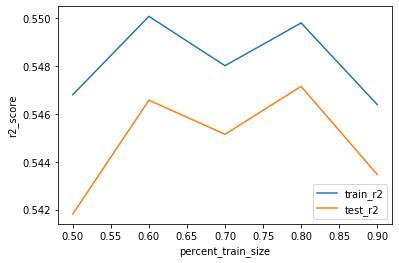

In [10]:
learning.plot.line(y=["train_r2", "test_r2"])
plt.xlabel("percent_train_size")
plt.ylabel("r2_score")
plt.show()

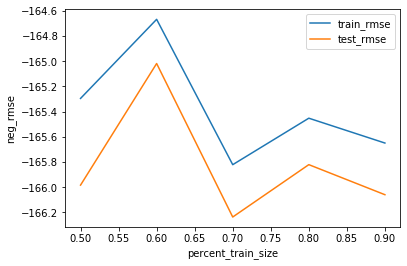

In [11]:
learning.plot.line(y=["train_rmse", "test_rmse"])
plt.xlabel("percent_train_size")
plt.ylabel("neg_rmse")
plt.show()

## Batch Gradient Descent

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
# cross validation to find optimal hyperparameters

val_scores = {}
train_percent = 0.8
learning_rates = np.linspace(0.001, 0.7, 10)
iterations = 1000
X, y = splits[train_percent][0], splits[train_percent][2].to_numpy()


for eta in learning_rates:
    val_scores[eta] = {}
        
    cv_results = {
        "train_r2": [],
        "val_r2": [],
        "train_rmse": [],
        "val_rmse": []
    }

    for split in cv_splits[train_percent]:
        X_train = X[split[0]]
        y_train = y[split[0]]
        X_val = X[split[1]]
        y_val = y[split[1]]

        # Batch Gradient Descent
        m = len(X_train)

        theta = np.random.randn(22, 1) # random initialization

        for iteration in range(iterations):
            gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
            theta = theta - eta * gradients

        # find score for this cv run
        train_pred = X_train.dot(theta)
        cv_results["train_r2"].append(r2_score(y_train, train_pred))
        cv_results["train_rmse"].append(mean_squared_error(y_train, train_pred, squared=False))

        val_pred = X_val.dot(theta)
        cv_results["val_r2"].append(r2_score(y_val, val_pred))
        cv_results["val_rmse"].append(mean_squared_error(y_val, val_pred, squared=False))


    # average the cv_results
    train_r2_mean = np.mean(cv_results["train_r2"])
    test_r2_mean = np.mean(cv_results["val_r2"])
    train_rmse_mean = np.mean(cv_results["train_rmse"])
    test_rmse_mean = np.mean(cv_results["val_rmse"])

    val_scores[eta] = {
        "train_r2": train_r2_mean,
        "test_r2": test_r2_mean,
        "train_rmse": train_rmse_mean,
        "test_rmse": test_rmse_mean
    }

In [14]:
validation = pd.DataFrame(data=val_scores).transpose()

In [15]:
validation

,train_r2,test_r2,train_rmse,test_rmse
0.001000,0.226162,0.225700,216.918766,216.891023
0.078667,0.526582,0.524769,169.664995,169.847332
0.156333,0.538346,0.536170,167.543882,167.798409
0.234000,0.542899,0.540567,166.715558,167.004717
0.311667,0.545303,0.542895,166.276728,166.584714
0.389333,0.546754,0.544302,166.011125,166.330906
0.467000,0.547690,0.545213,165.839656,166.166862
0.544667,0.548311,0.545819,165.725834,166.057989
0.622333,0.548738,0.546234,165.647420,165.983419
0.700000,0.549038,0.546526,165.592493,165.931053


Text(0, 0.5, 'r2')

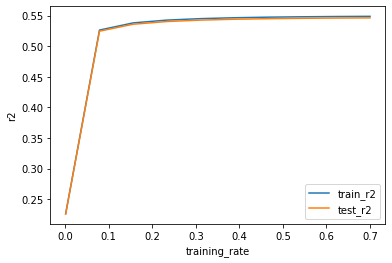

In [16]:
validation.plot.line(y=["train_r2", "test_r2"])
plt.xlabel("training_rate")
plt.ylabel("r2")

Text(0, 0.5, 'rmse')

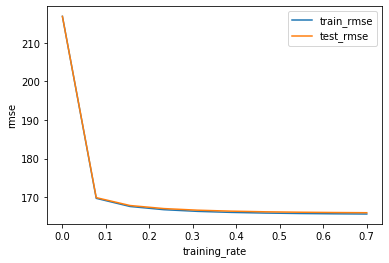

In [17]:
validation.plot.line(y=["train_rmse", "test_rmse"])
plt.xlabel("training_rate")
plt.ylabel("rmse")

In [18]:
# cross validation to find optimal hyperparameters

val_scores = {}
learning_rate = 0.7
iterations = 1000

for train_percent in splits:
    X, y = splits[train_percent][0], splits[train_percent][2].to_numpy()
        
    cv_results = {
        "train_r2": [],
        "val_r2": [],
        "train_rmse": [],
        "val_rmse": []
    }

    for split in cv_splits[train_percent]:
        X_train = X[split[0]]
        y_train = y[split[0]]
        X_val = X[split[1]]
        y_val = y[split[1]]

        # Batch Gradient Descent
        m = len(X_train)

        theta = np.random.randn(22, 1) # random initialization

        for iteration in range(iterations):
            gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
            theta = theta - eta * gradients

        # find score for this cv run
        train_pred = X_train.dot(theta)
        cv_results["train_r2"].append(r2_score(y_train, train_pred))
        cv_results["train_rmse"].append(mean_squared_error(y_train, train_pred, squared=False))

        val_pred = X_val.dot(theta)
        cv_results["val_r2"].append(r2_score(y_val, val_pred))
        cv_results["val_rmse"].append(mean_squared_error(y_val, val_pred, squared=False))


    # average the cv_results
    train_r2_mean = np.mean(cv_results["train_r2"])
    test_r2_mean = np.mean(cv_results["val_r2"])
    train_rmse_mean = np.mean(cv_results["train_rmse"])
    test_rmse_mean = np.mean(cv_results["val_rmse"])

    val_scores[train_percent] = {
        "train_r2": train_r2_mean,
        "test_r2": test_r2_mean,
        "train_rmse": 0 - train_rmse_mean, # negative rmse to match above
        "test_rmse": 0 - test_rmse_mean
    }

In [19]:
val_scores

{0.5: {'train_r2': 0.546257909261523,
  'test_r2': 0.5414458621391687,
  'train_rmse': -165.3953258911445,
  'test_rmse': -166.05017018513735},
 0.6: {'train_r2': 0.549529526275276,
  'test_r2': 0.5461725958509256,
  'train_rmse': -164.7682275763375,
  'test_rmse': -165.09643813642717},
 0.7: {'train_r2': 0.5472606869011705,
  'test_r2': 0.5444872872963267,
  'train_rmse': -165.95934694114018,
  'test_rmse': -166.3529911859452},
 0.8: {'train_r2': 0.5490375013334101,
  'test_r2': 0.5465248120112205,
  'train_rmse': -165.59250251422435,
  'test_rmse': -165.93118527572182},
 0.9: {'train_r2': 0.5456358642859647,
  'test_r2': 0.5428221680292712,
  'train_rmse': -165.7876078472248,
  'test_rmse': -166.17718372365294}}

In [20]:
learning = pd.DataFrame(data=val_scores).transpose()

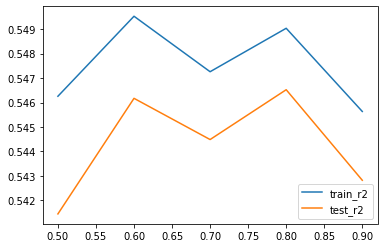

In [21]:
learning.plot.line(y=["train_r2", "test_r2"])

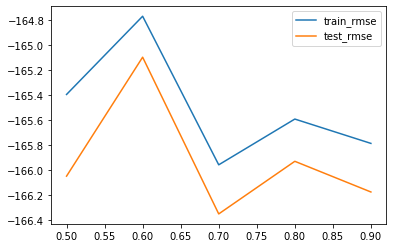

In [22]:
learning.plot.line(y=["train_rmse", "test_rmse"])

## Regularized Regression models

### Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [24]:
cv_results = {}
for train_percent in cv_splits:
    params = {
        "alpha": np.linspace(0.01, 15, 25)
    }
    
    cv = GridSearchCV(Ridge(), params, n_jobs=-1, cv=cv_splits[train_percent], return_train_score=True)
    
    X_train, y_train = splits[train_percent][0], splits[train_percent][2]
    cv.fit(X_train, y_train)
    
    cv_results[train_percent] = cv

In [25]:
for percent, cv in zip(cv_results.keys(), cv_results.values()):
    print(percent, cv.best_score_, cv.best_params_)

0.5 0.5420288154625819 {'alpha': 2.5083333333333333}
0.6 0.5466818901765771 {'alpha': 1.2591666666666668}
0.7 0.5452597437663397 {'alpha': 1.8837500000000003}
0.8 0.54727021699542 {'alpha': 1.2591666666666668}
0.9 0.5435700785239674 {'alpha': 1.8837500000000003}


In [26]:
def graph_cv(cv):
    results = pd.DataFrame(data=cv.cv_results_)
    
    # get the parameters of the best run
    best = results.loc[cv.best_index_]
    best_params = best["params"]
    
    graph_param = list(best_params.keys())[0]
    results.plot.line(x=f"param_{graph_param}", y=["mean_train_score", "mean_test_score"])
    plt.show()

0.5


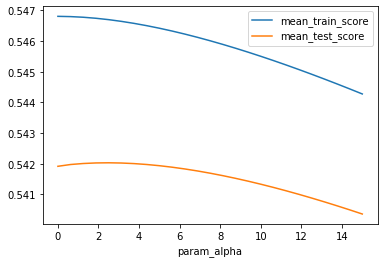

0.6


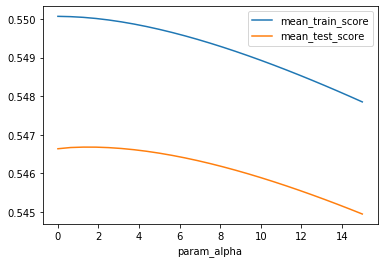

0.7


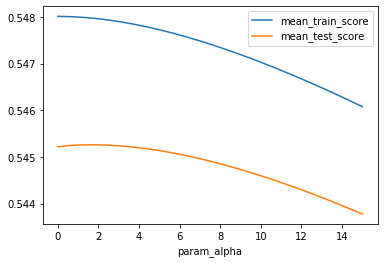

0.8


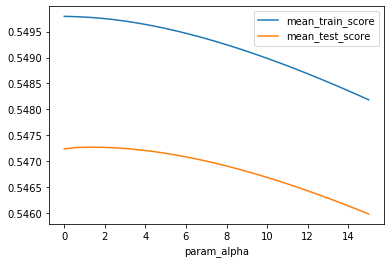

0.9


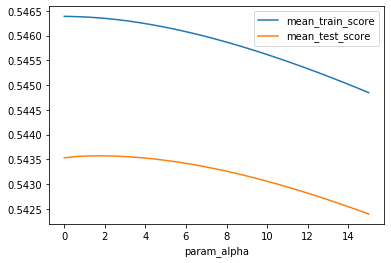

In [27]:
for percent in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print(percent)
    graph_cv(cv_results[percent])

In [28]:
def graph_overfit(cv):
    scores = {}
    
    for percent in cv:
        cv_results = pd.DataFrame(data=cv[percent].cv_results_)
        best_index = cv[percent].best_index_
        train_score = cv_results.loc[best_index]["mean_train_score"]
        test_score = cv_results.loc[best_index]["mean_test_score"]
        scores[percent] = {"train_score": train_score, "test_score": test_score}
        
    result = pd.DataFrame(data=scores).transpose()
    result.plot.line(y=["train_score", "test_score"])

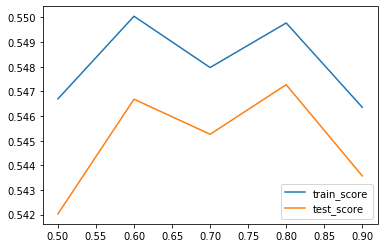

In [29]:
graph_overfit(cv_results)

### Lasso Regression

In [30]:
from sklearn.linear_model import Lasso

In [31]:
cv_results = {}
for train_percent in cv_splits:
    params = {
        "alpha": np.linspace(0.005, 0.1, 25)
    }
    
    cv = GridSearchCV(Lasso(), params, n_jobs=-1, cv=cv_splits[train_percent], return_train_score=True)
    
    X_train, y_train = splits[train_percent][0], splits[train_percent][2]
    cv.fit(X_train, y_train)
    
    cv_results[train_percent] = cv

C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195740.28316241503, tolerance: 97405.65101580623
  positive)


In [32]:
for percent, cv in zip(cv_results.keys(), cv_results.values()):
    print(percent, cv.best_score_, cv.best_params_)

0.5 0.5419670086833476 {'alpha': 0.02875}
0.6 0.5466744482653884 {'alpha': 0.016875}
0.7 0.5452711180123757 {'alpha': 0.02479166666666667}
0.8 0.5472484924658068 {'alpha': 0.005}
0.9 0.543543594542489 {'alpha': 0.012916666666666667}


0.5


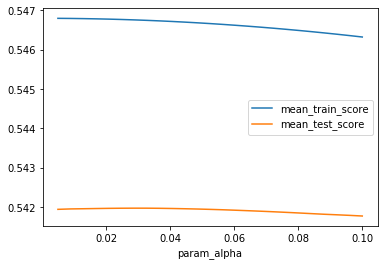

0.6


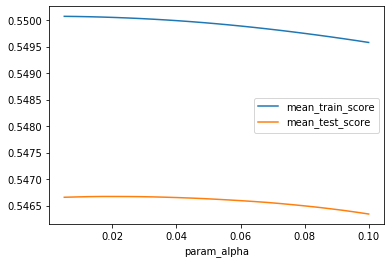

0.7


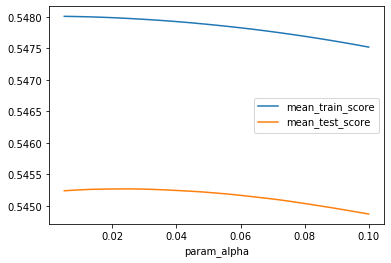

0.8


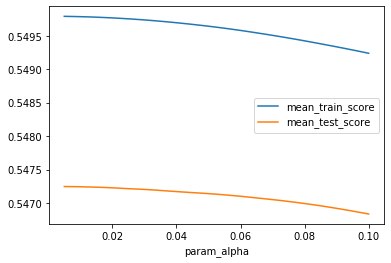

0.9


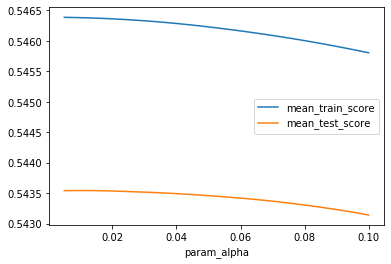

In [33]:
for percent in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print(percent)
    graph_cv(cv_results[percent])

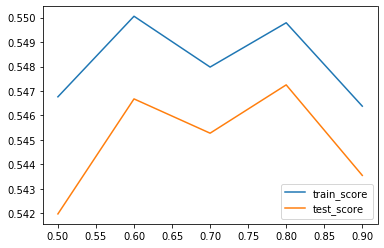

In [34]:
graph_overfit(cv_results)

## Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [36]:
def poly_regression(degree=1):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [37]:
cv_results = {}
for train_percent in cv_splits:
    params = {
        "polynomialfeatures__degree": np.arange(2, 4),
        
    }
    
    cv = GridSearchCV(poly_regression(), params, n_jobs=-1, cv=cv_splits[train_percent], return_train_score=True)
    
    X_train, y_train = splits[train_percent][0], splits[train_percent][2]
    cv.fit(X_train, y_train)
    
    cv_results[train_percent] = cv

In [38]:
for percent, cv in zip(cv_results.keys(), cv_results.values()):
    print(percent, cv.best_score_, cv.best_params_)

0.5 0.6004096609642178 {'polynomialfeatures__degree': 2}
0.6 0.6146748590345261 {'polynomialfeatures__degree': 2}
0.7 0.6110134622121484 {'polynomialfeatures__degree': 2}
0.8 0.6166521289778107 {'polynomialfeatures__degree': 2}
0.9 0.6141196682819886 {'polynomialfeatures__degree': 2}


0.5


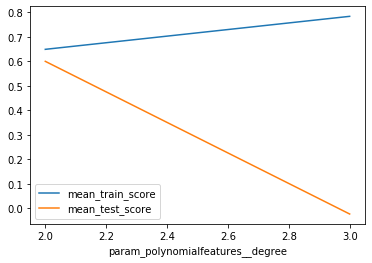

0.6


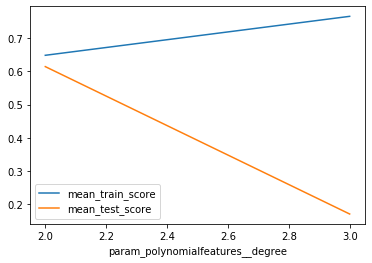

0.7


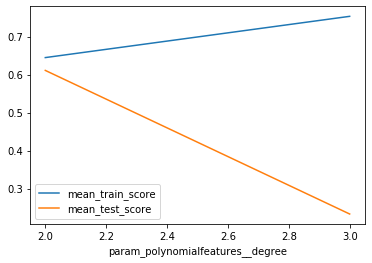

0.8


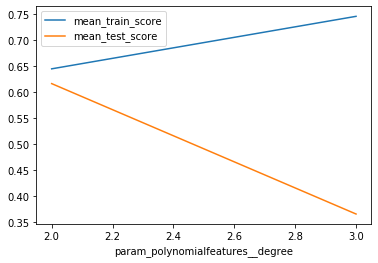

0.9


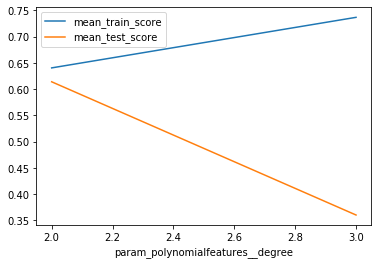

In [39]:
for percent in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print(percent)
    graph_cv(cv_results[percent])

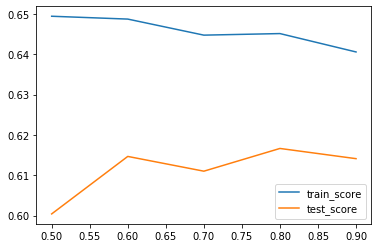

In [40]:
graph_overfit(cv_results)

## Final Evaluation

In [46]:
splits[0.6]

[array([[0.31092437, 0.24704816, 0.08654971, ..., 0.02323009, 0.53731343,
         0.3452256 ],
        [0.49159664, 0.4858911 , 0.        , ..., 0.10287611, 0.62686567,
         0.98111228],
        [0.24579832, 0.18474544, 0.0374269 , ..., 0.01216814, 0.44776119,
         0.181532  ],
        ...,
        [0.24159664, 0.36255699, 0.05730994, ..., 0.13274336, 0.59701493,
         0.5690801 ],
        [0.19537815, 0.31079758, 0.        , ..., 0.        , 0.6119403 ,
         0.37390696],
        [0.24789916, 0.32708382, 0.        , ..., 0.49115044, 0.71641791,
         0.41238195]]),
 array([[0.22058824, 0.23757891, 0.27017544, ..., 0.14380531, 0.47761194,
         0.15669815],
        [0.21428571, 0.37092296, 0.        , ..., 0.47455752, 0.65671642,
         0.27562085],
        [0.24159664, 0.48052081, 0.10409357, ..., 0.        , 0.79104478,
         0.78593914],
        ...,
        [0.23109244, 0.25041647, 0.07368421, ..., 0.2909292 , 0.58208955,
         0.37635537],
        [0.2

In [60]:
# linear regression
linreg = LinearRegression()
linreg.fit(splits[0.6][0], splits[0.6][2].to_numpy())

predictions = linreg.predict(splits[0.6][1])
r2 = r2_score(splits[0.6][3], predictions)
rmse = mean_squared_error(splits[0.6][3], predictions, squared=False)

print("R2", r2)
print("RMSE", rmse)

R2 0.5402140928366971
RMSE 166.51781952652422


In [55]:
# batch gradient descent
m = len(X_train)
eta = 0.7
theta = np.random.randn(22, 1) # random initialization

for iteration in range(1000):
    gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
    theta = theta - eta * gradients

predictions = splits[0.6][1].dot(theta)
r2 = r2_score(splits[0.6][3], predictions)
rmse = mean_squared_error(splits[0.6][3], predictions, squared=False)

print("R2", r2)
print("RMSE", rmse)

R2 0.5316087360545778
RMSE 168.06887023329003


In [58]:
# ridge regression
ridge = Ridge(alpha=1.26)
ridge.fit(splits[0.6][0], splits[0.6][2].to_numpy())

predictions = ridge.predict(splits[0.6][1])
r2 = r2_score(splits[0.6][3], predictions)
rmse = mean_squared_error(splits[0.6][3], predictions, squared=False)

print("R2", r2)
print("RMSE", rmse)

R2 0.5402409847943086
RMSE 166.51294980829928


In [62]:
# ridge regression
lasso = Lasso(alpha=0.005)
lasso.fit(splits[0.8][0], splits[0.8][2].to_numpy())

predictions = lasso.predict(splits[0.8][1])
r2 = r2_score(splits[0.8][3], predictions)
rmse = mean_squared_error(splits[0.8][3], predictions, squared=False)

print("R2", r2)
print("RMSE", rmse)

R2 0.5335265110856062
RMSE 164.76885955555147


C:\Users\michl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195740.28316241503, tolerance: 97405.65101580623
  positive)


In [64]:
# polynomial regression
# ridge regression
polynomial = poly_regression(2)
polynomial.fit(splits[0.8][0], splits[0.8][2].to_numpy())

predictions = polynomial.predict(splits[0.8][1])
r2 = r2_score(splits[0.8][3], predictions)
rmse = mean_squared_error(splits[0.8][3], predictions, squared=False)

print("R2", r2)
print("RMSE", rmse)

R2 0.6006652502677066
RMSE 152.4509743385002
